In [5]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [6]:
dataset = 'model/keypoint_classifier/keypoint.csv'
# model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'


# 分類数設定

In [7]:
NUM_CLASSES = 5

# 学習データ読み込み

In [8]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [9]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2024-11-22 11:58:34.591533: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-11-22 11:58:34.591858: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-22 11:58:34.591872: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-22 11:58:34.592082: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-22 11:58:34.592398: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [14]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [15]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


2024-11-22 11:58:37.807426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2778 - loss: 1.5863
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.2784 - loss: 1.5848 - val_accuracy: 0.3539 - val_loss: 1.4379
Epoch 2/1000
26/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3388 - loss: 1.4475
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3386 - loss: 1.4445 - val_accuracy: 0.3624 - val_loss: 1.3447
Epoch 3/1000
26/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3586 - loss: 1.3816
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3596 - loss: 1.3804 - val_accuracy: 0.4957 - val_loss: 1.2678
Epoch 4/1000
27/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4079 - loss: 1.3337
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━

In [16]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9683 - loss: 0.2137


In [17]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [18]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[0.08902843 0.06265026 0.766209   0.01934702 0.06276535]
2


# 混同行列

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


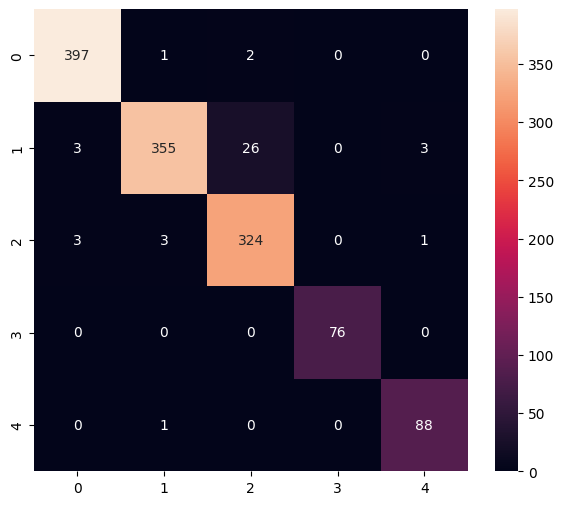

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.99      0.92      0.95       387
           2       0.92      0.98      0.95       331
           3       1.00      1.00      1.00        76
           4       0.96      0.99      0.97        89

    accuracy                           0.97      1283
   macro avg       0.97      0.98      0.97      1283
weighted avg       0.97      0.97      0.97      1283



In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [20]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/33/hd2y9vxs2bz2q9hn_bbnrw0m0000gn/T/tmp869qvx7g/assets


INFO:tensorflow:Assets written to: /var/folders/33/hd2y9vxs2bz2q9hn_bbnrw0m0000gn/T/tmp869qvx7g/assets


In [ ]:
# Minimal conversion settings
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# No optimizations
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
tflite_model = converter.convert()

with open(tflite_save_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/33/hd2y9vxs2bz2q9hn_bbnrw0m0000gn/T/tmpdefo9f3t/assets


INFO:tensorflow:Assets written to: /var/folders/33/hd2y9vxs2bz2q9hn_bbnrw0m0000gn/T/tmpdefo9f3t/assets


In [ ]:
print("Starting conversion...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Remove quantization for now to test basic conversion
print("Converting...")
tflite_model = converter.convert()
print("Conversion complete, saving file...")
open(tflite_save_path, 'wb').write(tflite_model)
print("Done!")

Starting conversion...
Converting...
INFO:tensorflow:Assets written to: /var/folders/33/hd2y9vxs2bz2q9hn_bbnrw0m0000gn/T/tmpnv941fsa/assets


INFO:tensorflow:Assets written to: /var/folders/33/hd2y9vxs2bz2q9hn_bbnrw0m0000gn/T/tmpnv941fsa/assets


# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

NameError: name 'tflite_save_path' is not defined

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.7729778  0.16973573 0.05728643]
0
